In [1]:
# Imports
from SimulationWater import Simulation
import subprocess
import numpy as np
import pandas as pd
from openmm import unit
import matplotlib.pyplot as plt

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


In [2]:
# Simulation Parameters
######################
Temperature = 300.                  # Temperature of the System (Kelvin)
Steps = 5000                        # Number of Steps/Frames to render in the Simulation (Unitless) (Integer)
SkipSteps = 10                      # Multiplier for how Many Steps to Run (Integer/Unitless)
EquilSteps = 100                    # Number of Steps to Run Before running the Simulation (Reach Equilibrium first) (Integer/Unitless)
Box_edge=1 # *unit.nanometers       # The Length of each Edge of the Box (Cube) (Nanometers)
######################

The size of the periodic box is:  [Quantity(value=Vec3(x=1.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=1.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=1.0), unit=nanometer)]
Simulation beginning...


,Box Edge Size (Nanometers),Simulation Steps,Number of Water Molecules,Number of Neighbors O-O,Number of Neighbors O-H
0,1,5000,32.0,4.29605,1.879544


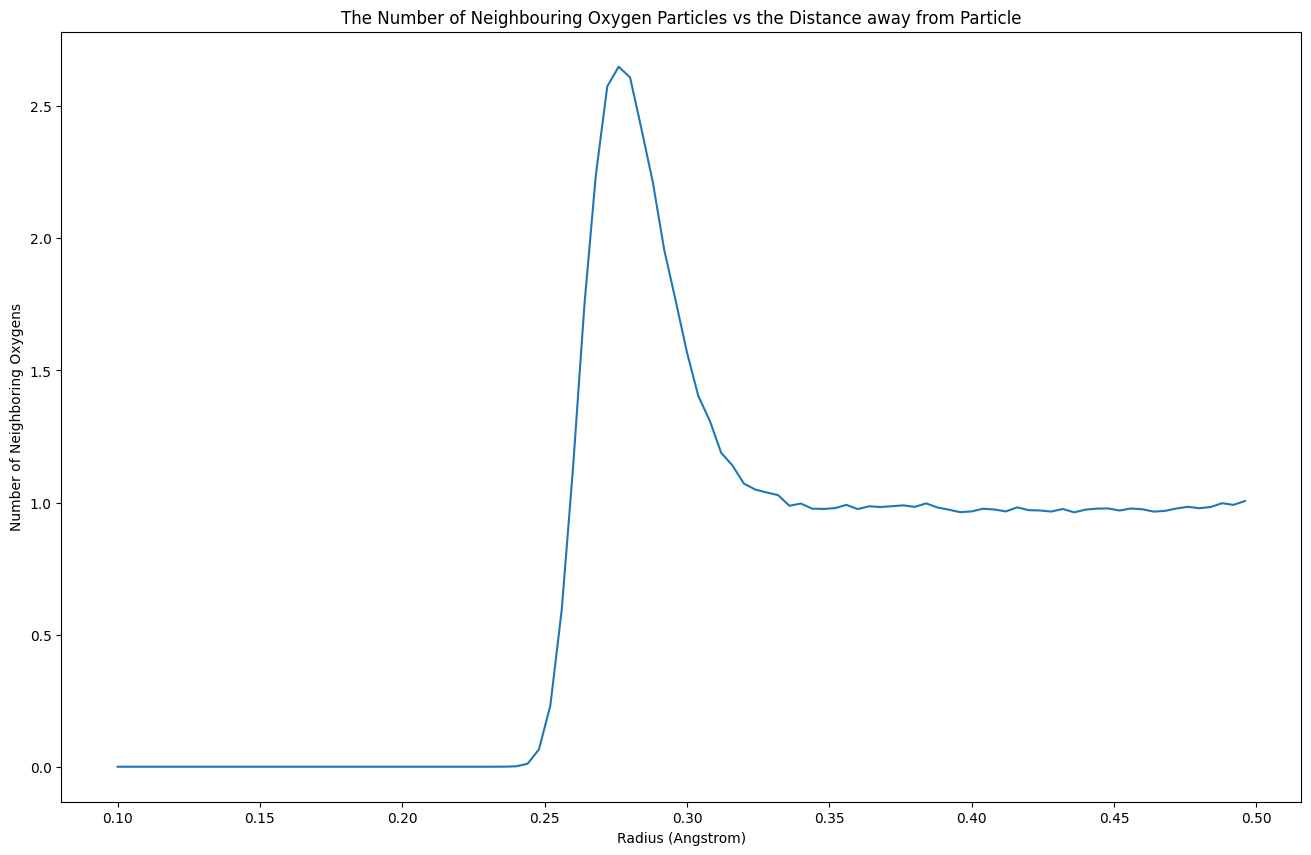

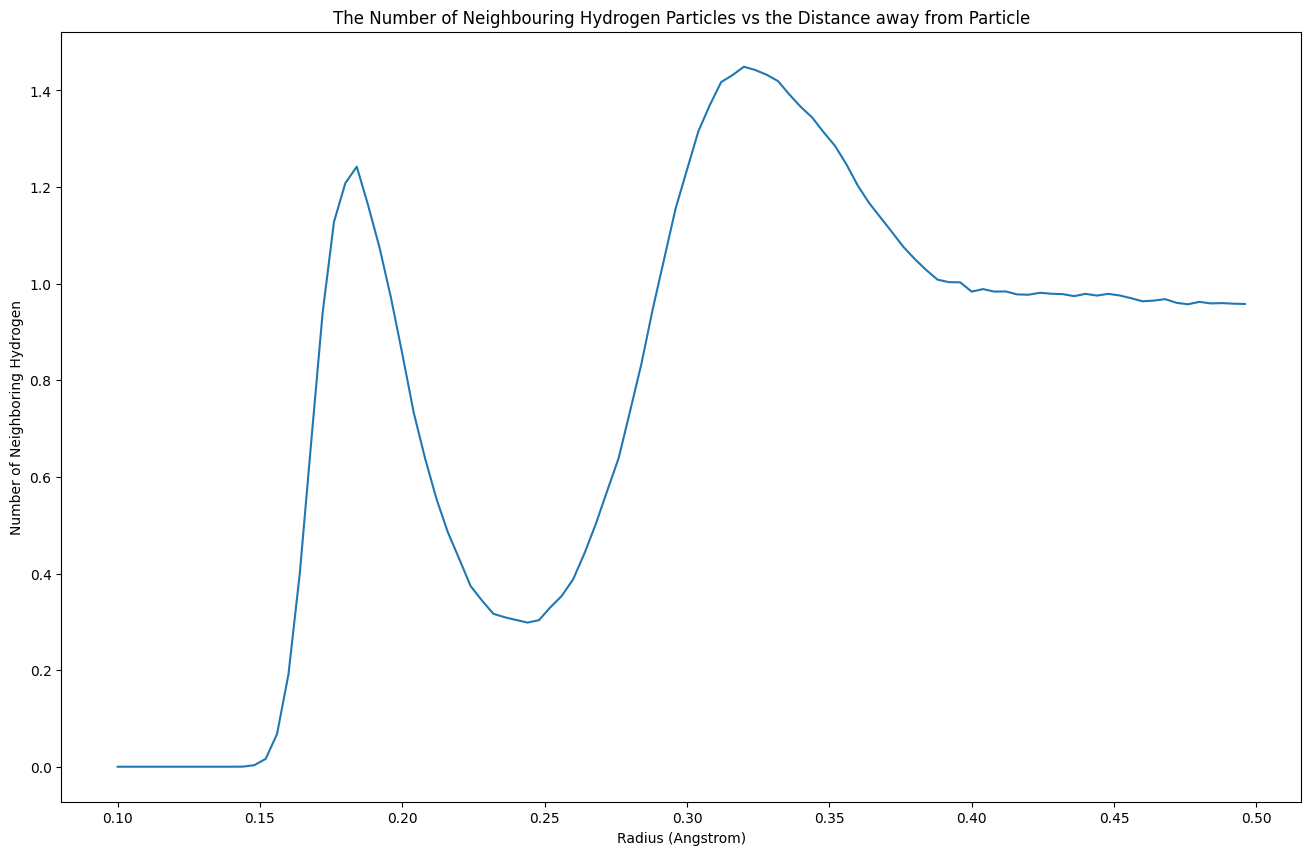

In [3]:
# Single Simulation with Average
def GetGRFunction (Temperature, Steps, SkipSteps, EquilSteps, Box_Edge, printOutput = False):
    # Run the Simulation
    Simulation(Temperature, Steps, SkipSteps, EquilSteps, Box_Edge, printOutput)

    # Run a Subprocess to Simulate a CLI Interaction (Command Line) and Automatically Run and Extract info from genPairDistancesWater.py
    genPairDistanceResult = subprocess.run(f"python genPairDistancesWater.py h2o_liquid_traj_{Steps}_{Box_edge}.h5 {float(Box_Edge)}", shell=True, text=True, capture_output=True)

    # Extract the Lines
    genPairLines = genPairDistanceResult.stdout.split("\n")
    
    # Extract genPairDistance Info
    WaterMolecules = float(genPairLines[0].split("=")[1].strip())
    NeighboursOO = float(genPairLines[6].split("=")[1].strip())
    NeighboursOH = float(genPairLines[7].split("=")[1].strip())

    # Return the Number of Particles and the Average and Variance
    return [Box_Edge, Steps, WaterMolecules, NeighboursOO, NeighboursOH]

[BoxEdge, Steps, WaterMolecules,  NeighboursOO, NeighboursOH] = GetGRFunction(Temperature, Steps, SkipSteps, EquilSteps, Box_edge, False)

df = pd.DataFrame({
    "Box Edge Size (Nanometers)" : [BoxEdge],
    "Simulation Steps" : [Steps],
    "Number of Water Molecules" : [WaterMolecules],
    "Number of Neighbors O-O" : [NeighboursOO],
    "Number of Neighbors O-H" : [NeighboursOH]
})

display(df)

GrOO = pd.read_csv(f"OO_histo_{Steps}_{float(Box_edge)}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
GrOH = pd.read_csv(f"OH_histo_{Steps}_{float(Box_edge)}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    
plt.figure(figsize=(16, 10))
plt.plot(GrOO[GrOO.columns[0]], GrOO[GrOO.columns[1]], "-")
plt.title("The Number of Neighbouring Oxygen Particles vs the Distance away from Particle")
plt.xlabel("Radius (Angstrom)")
plt.ylabel("Number of Neighboring Oxygens")
plt.savefig("GROO_Prob.png")
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(GrOH[GrOH.columns[0]], GrOH[GrOH.columns[1]], "-")
plt.title("The Number of Neighbouring Hydrogen Particles vs the Distance away from Particle")
plt.xlabel("Radius (Angstrom)")
plt.ylabel("Number of Neighboring Hydrogen")
plt.savefig("GROH_Prob.png")
plt.show()

Steps = 5000
The size of the periodic box is:  [Quantity(value=Vec3(x=1.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=1.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=1.0), unit=nanometer)]
Simulation beginning...
Steps = 6000
The size of the periodic box is:  [Quantity(value=Vec3(x=1.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=1.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=1.0), unit=nanometer)]
Simulation beginning...
Steps = 7000
The size of the periodic box is:  [Quantity(value=Vec3(x=1.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=1.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=1.0), unit=nanometer)]
Simulation beginning...
Steps = 8000
The size of the periodic box is:  [Quantity(value=Vec3(x=1.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=1.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=1.0), unit=nanometer)]
Simulation beginning...
Step

,Box Edge Size (Nanometers),Simulation Steps,Number of Water Molecules,Number of Neighbors O-O,Number of Neighbors O-H
0,1,5000,32.0,4.279888,1.884873
1,1,6000,32.0,4.298187,1.893264
2,1,7000,32.0,4.282795,1.886400
3,1,8000,32.0,4.285711,1.889430
4,1,9000,32.0,4.297243,1.884536


,Box Edge Size (Nanometers),Simulation Steps,Number of Water Molecules,Number of Neighbors O-O,Number of Neighbors O-H
0,1.0,5000,32.0,4.279888,1.884873
1,1.1,5000,32.0,4.279888,1.884873
2,1.2,5000,32.0,4.279888,1.884873
3,1.3,5000,32.0,4.279888,1.884873
4,1.4,5000,32.0,4.279888,1.884873


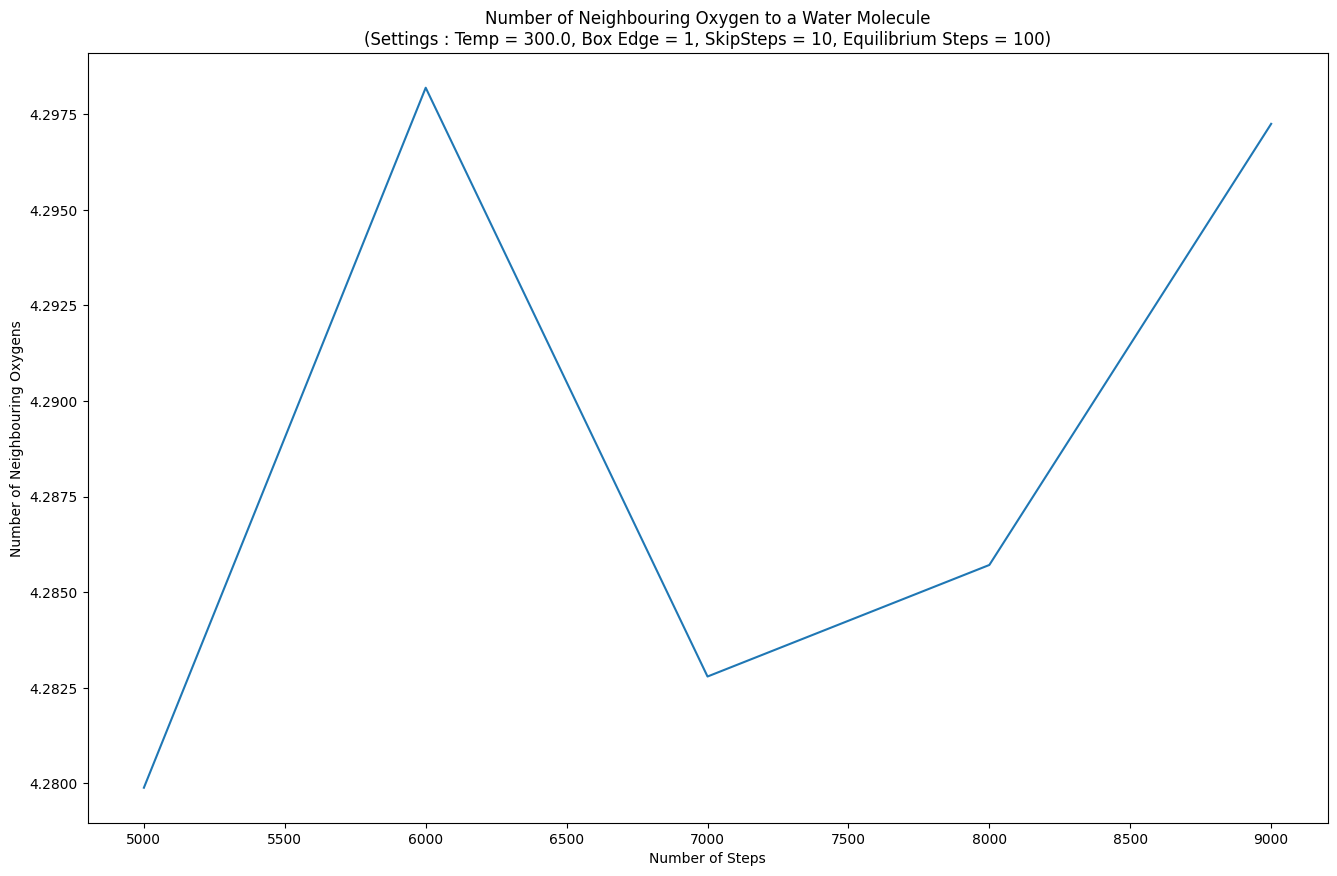

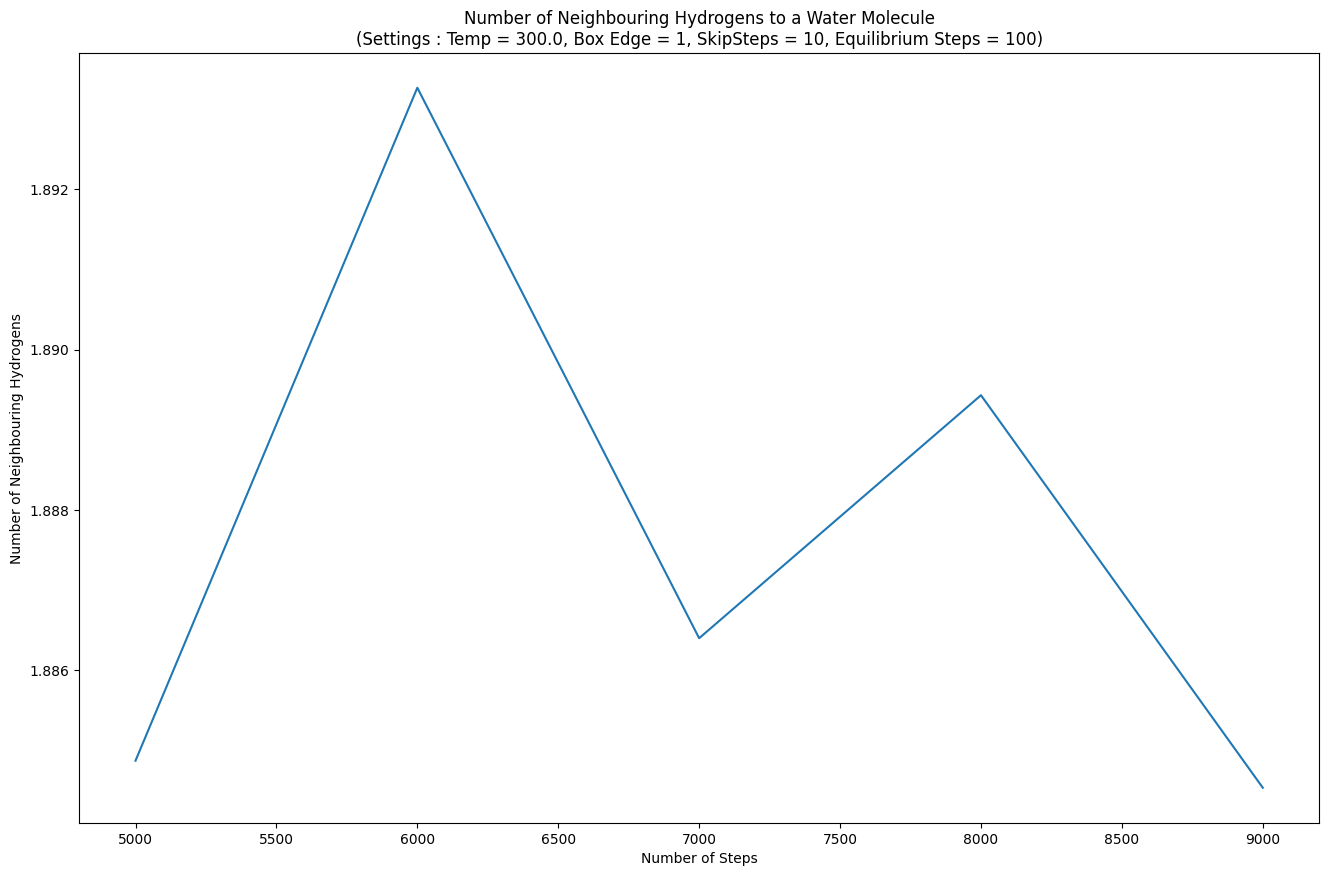

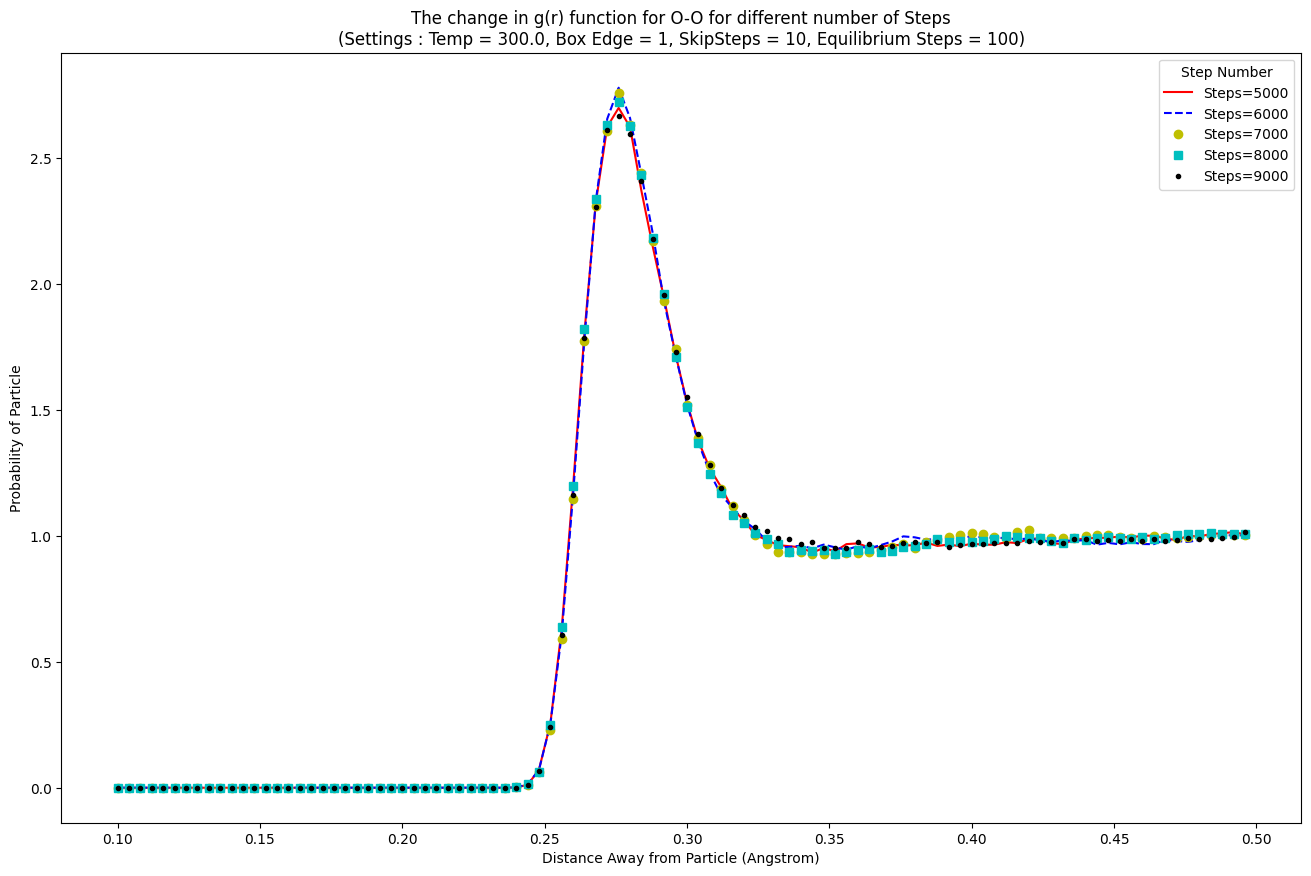

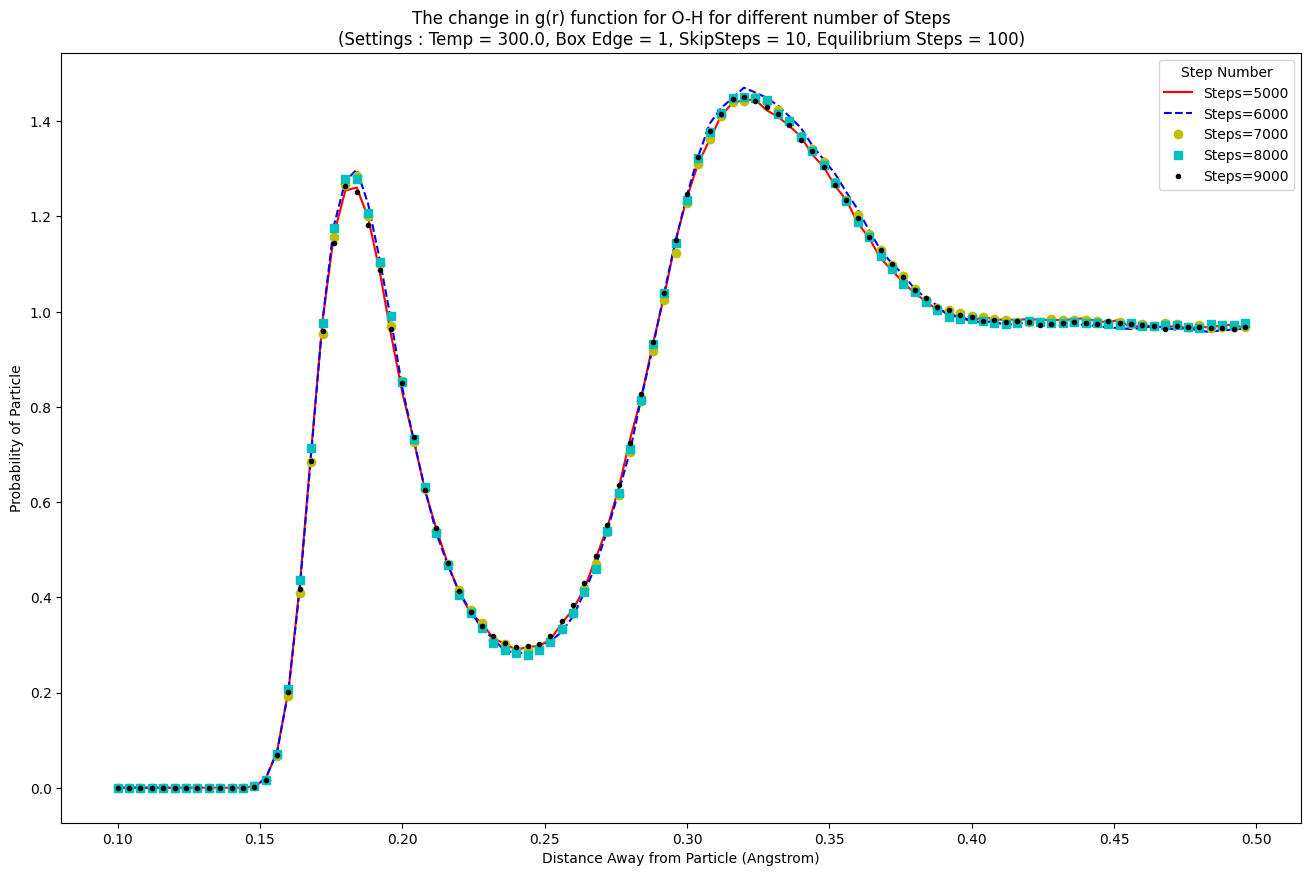

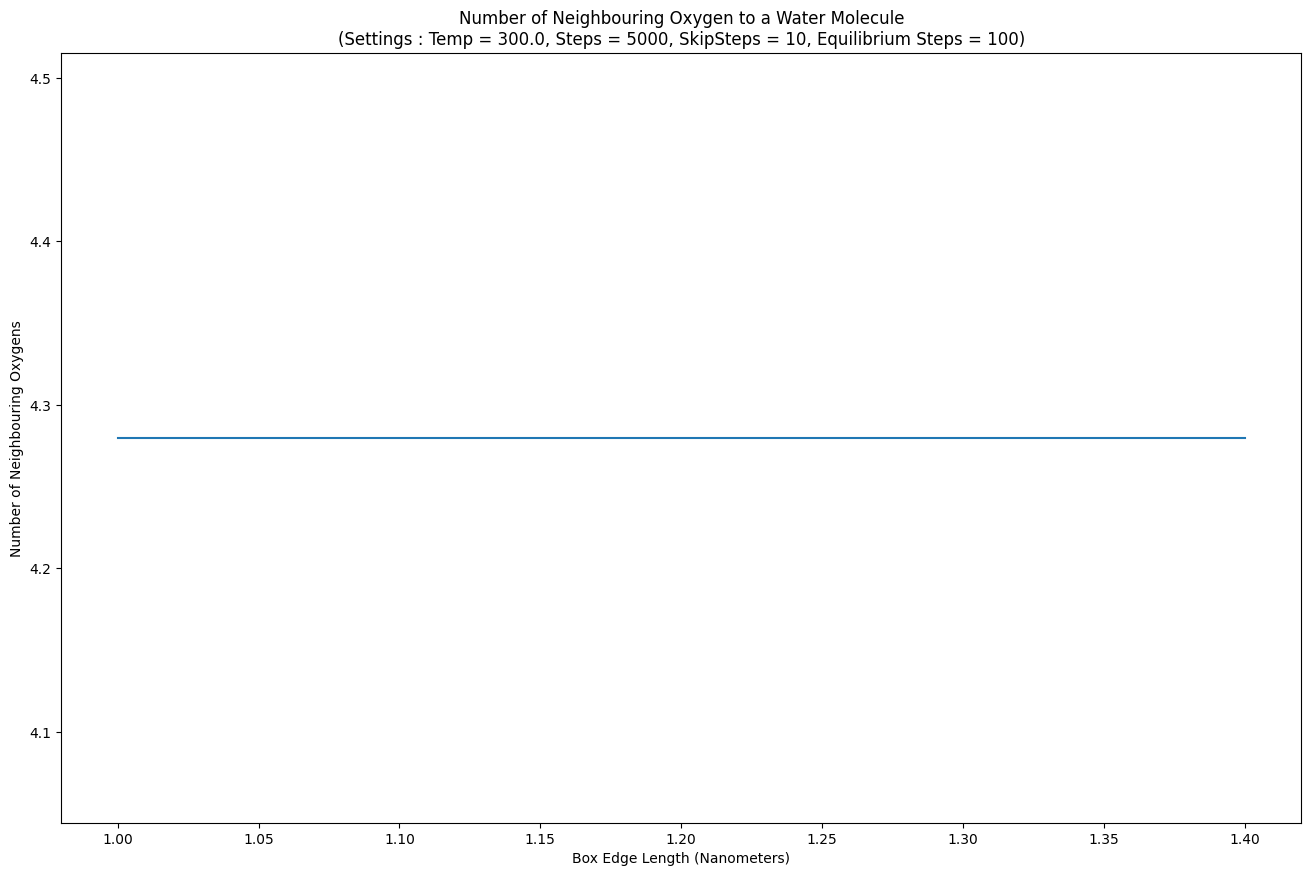

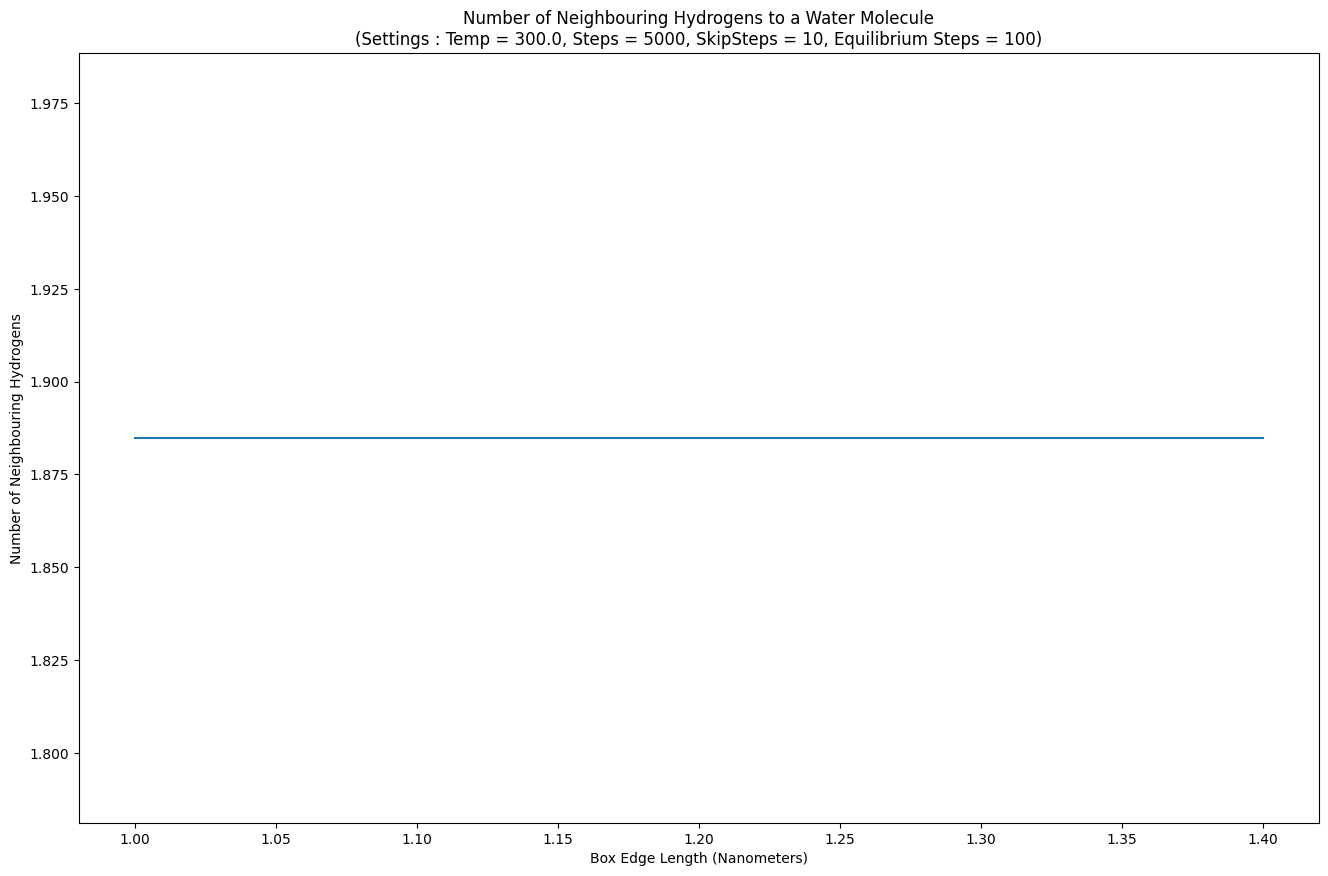

OO_histo_5000_1.0.txt
OO_histo_5000_1.1.txt
OO_histo_5000_1.2.txt
OO_histo_5000_1.3.txt
OO_histo_5000_1.4.txt


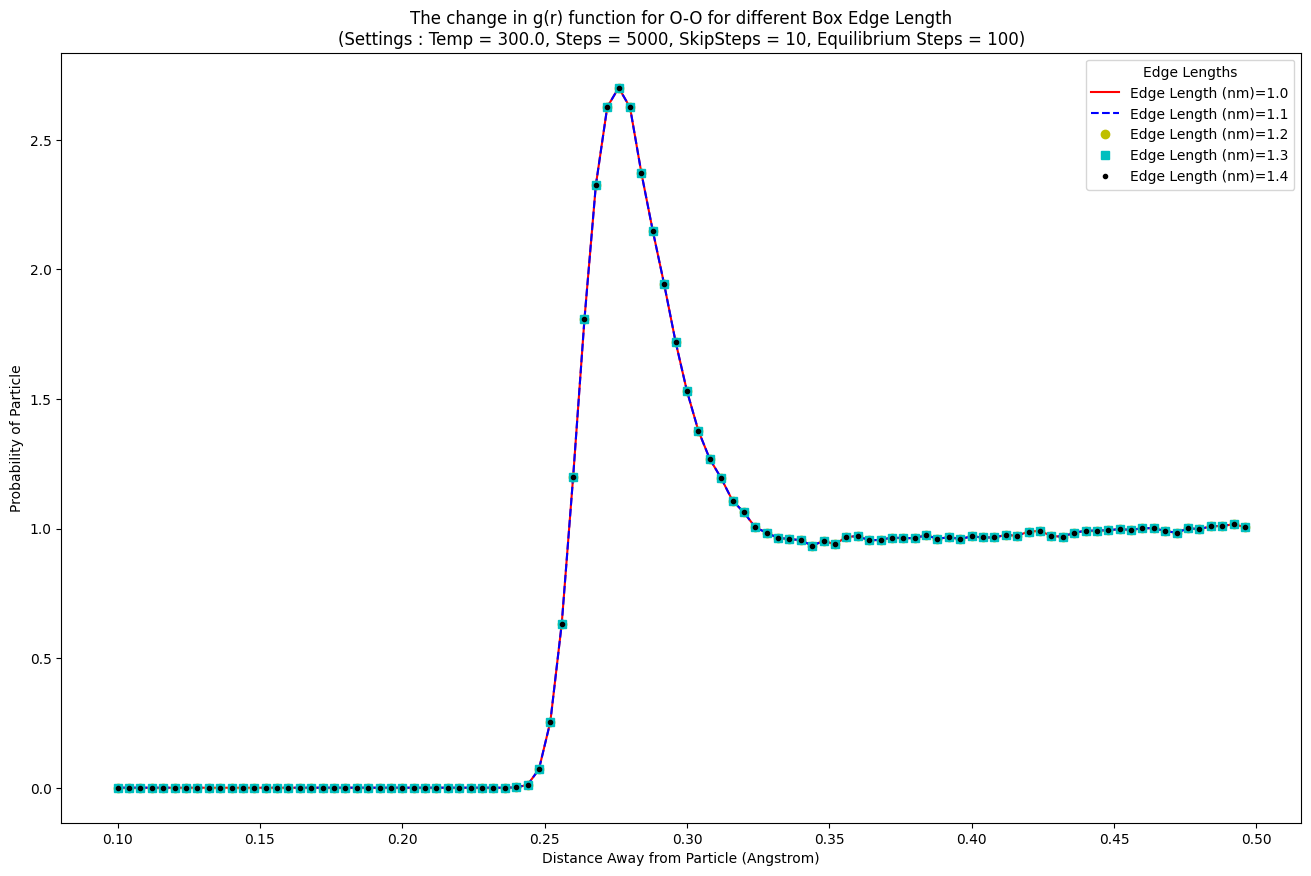

OH_histo_5000_1.0.txt
OH_histo_5000_1.1.txt
OH_histo_5000_1.2.txt
OH_histo_5000_1.3.txt
OH_histo_5000_1.4.txt


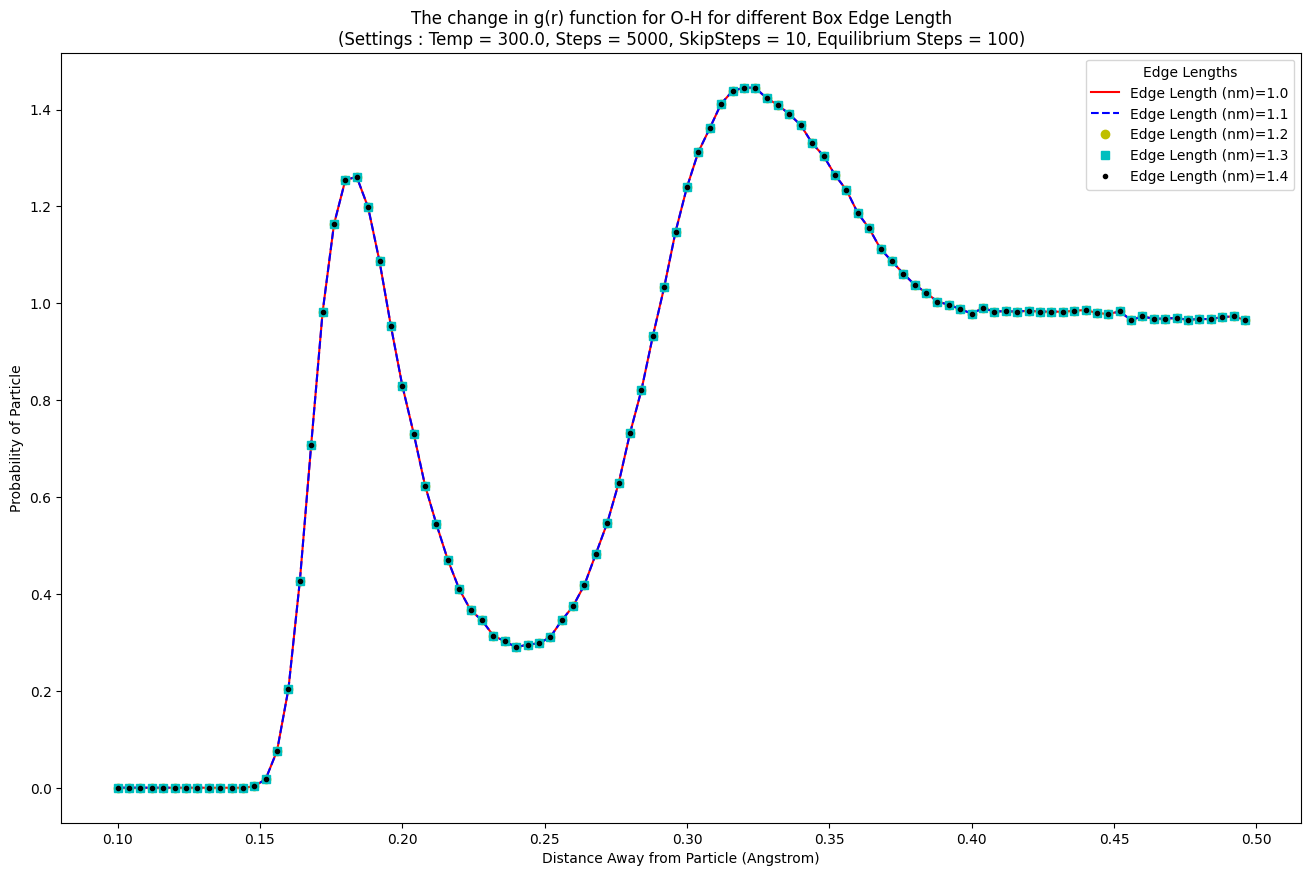

In [ ]:
# Simulation Parameters
######################
Temperature = 300.                  # Temperature of the System (Kelvin)
Steps = 5000                       # Number of Steps/Frames to render in the Simulation (Unitless) (Integer)
SkipSteps = 10                      # Multiplier for how Many Steps to Run (Integer/Unitless)
EquilSteps = 100                    # Number of Steps to Run Before running the Simulation (Reach Equilibrium first) (Integer/Unitless)
Box_edge=1 # *unit.nanometers     # The Length of each Edge of the Box (Cube) (Nanometers)
######################

# Define the Column headers for Dataframe
columnHeaders = ["Box Edge Size (Nanometers)", "Simulation Steps", "Number of Water Molecules", "Number of Neighbors O-O", "Number of Neighbors O-H"]

# Store Results in the following
results = []

# Empty Arrays
StepsArray = []
BoxEdgeArray = []
StepSims = []
EdgeSims = []

identifiers = ["r-", "b--", "yo", "cs", "k.", "g+"]

# Fill with Test Values
for i in range(5):
    StepsArray.append(Steps + 1000*i)
    
# Fill with Test Values
for i in range(5):
    BoxEdgeArray.append((Box_edge + 0.1*i))

# Go Through all the Steps    
for step in StepsArray:
    print(f"Steps = {step}")
    StepSims.append(GetGRFunction(Temperature, step, SkipSteps, EquilSteps, Box_edge))
    
# Go through all the Box Edges  
for edge in BoxEdgeArray:
    print(f"Edge = {edge}")
    EdgeSims.append(GetGRFunction(Temperature, Steps, SkipSteps, EquilSteps, edge))

# Create the DataFrame
modsSteps = pd.DataFrame(StepSims, columns=columnHeaders)
modsEdge = pd.DataFrame(EdgeSims, columns=columnHeaders)

# Display the DataFrame
display(modsSteps)
display(modsEdge)

#
# Changes in Steps
#

# Plot Change in O-O Neighbours
plt.figure(figsize=(16, 10))
plt.plot(modsSteps[columnHeaders[1]], np.abs(modsSteps[columnHeaders[3]]), "-")
plt.xlabel("Number of Steps")
plt.ylabel("Number of Neighbouring Oxygens")
plt.title(f"Number of Neighbouring Oxygen to a Water Molecule\n(Settings : Temp = {Temperature}, Box Edge = {Box_edge}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("O-O_Neighbours_Steps.png")
plt.show()

# Plot Change in O-O Neighbours
plt.figure(figsize=(16, 10))
plt.plot(modsSteps[columnHeaders[1]], np.abs(modsSteps[columnHeaders[4]]), "-")
plt.xlabel("Number of Steps")
plt.ylabel("Number of Neighbouring Hydrogens")
plt.title(f"Number of Neighbouring Hydrogens to a Water Molecule\n(Settings : Temp = {Temperature}, Box Edge = {Box_edge}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("O-H_Neighbours_Steps.png")
plt.show()

# Plot the Change in G(r) O-O
plt.figure(figsize=(16, 10))
for i in range(len(StepsArray)):
    Gr = pd.read_csv(f"OO_histo_{StepsArray[i]}_{float(Box_edge)}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], identifiers[i], label=f"Steps={StepsArray[i]}")
    
plt.xlabel("Distance Away from Particle (Angstrom)")
plt.ylabel("Probability of Particle")
plt.title(f"The change in g(r) function for O-O for different number of Steps\n(Settings : Temp = {Temperature}, Box Edge = {Box_edge}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.legend(title="Step Number")
plt.savefig("Gr_Change_Steps_OO.png")
plt.show()

# Plot the Change in G(r) O-O
plt.figure(figsize=(16, 10))
for i in range(len(StepsArray)):
    Gr = pd.read_csv(f"OH_histo_{StepsArray[i]}_{float(Box_edge)}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], identifiers[i], label=f"Steps={StepsArray[i]}")
    
plt.xlabel("Distance Away from Particle (Angstrom)")
plt.ylabel("Probability of Particle")
plt.title(f"The change in g(r) function for O-H for different number of Steps\n(Settings : Temp = {Temperature}, Box Edge = {Box_edge}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.legend(title="Step Number")
plt.savefig("Gr_Change_Steps_OH.png")
plt.show()

#
# Change in Box Length
#

# Plot Change in O-O Neighbours
plt.figure(figsize=(16, 10))
plt.plot(modsEdge[columnHeaders[0]], np.abs(modsEdge[columnHeaders[3]]), "-")
plt.xlabel("Box Edge Length (Nanometers)")
plt.ylabel("Number of Neighbouring Oxygens")
plt.title(f"Number of Neighbouring Oxygen to a Water Molecule\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("O-O_Neighbours_BoxEdge.png")
plt.show()

# Plot Change in O-O Neighbours
plt.figure(figsize=(16, 10))
plt.plot(modsEdge[columnHeaders[0]], np.abs(modsEdge[columnHeaders[4]]), "-")
plt.xlabel("Box Edge Length (Nanometers)")
plt.ylabel("Number of Neighbouring Hydrogens")
plt.title(f"Number of Neighbouring Hydrogens to a Water Molecule\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("O-H_Neighbours_BoxEdge.png")
plt.show()

# Plot the Change in G(r) O-O
plt.figure(figsize=(16, 10))
for i in range(len(BoxEdgeArray)):
    Gr = pd.read_csv(f"OO_histo_{Steps}_{float(BoxEdgeArray[i])}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], identifiers[i], label=f"Edge Length (nm)={BoxEdgeArray[i]}")
    
plt.xlabel("Distance Away from Particle (Angstrom)")
plt.ylabel("Probability of Particle")
plt.title(f"The change in g(r) function for O-O for different Box Edge Length\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.legend(title="Edge Lengths")
plt.savefig("Gr_Change_EdgeLength_OO.png")
plt.show()

# Plot the Change in G(r) O-O
plt.figure(figsize=(16, 10))
for i in range(len(BoxEdgeArray)):
    Gr = pd.read_csv(f"OH_histo_{Steps}_{float(BoxEdgeArray[i])}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], identifiers[i], label=f"Edge Length (nm)={BoxEdgeArray[i]}")
    
plt.xlabel("Distance Away from Particle (Angstrom)")
plt.ylabel("Probability of Particle")
plt.title(f"The change in g(r) function for O-H for different Box Edge Length\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.legend(title="Edge Lengths")
plt.savefig("Gr_Change_EdgeLength_OH.png")
plt.show()